In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import tensorflow_datasets as tfds
import numpy as np

In [ ]:
malaria = tfds.image_classification.malaria

In [ ]:
malaria

<module 'tensorflow_datasets.image_classification.malaria' from '/usr/local/lib/python3.7/dist-packages/tensorflow_datasets/image_classification/malaria.py'>

In [ ]:
(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'malaria',
    split = ['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info = True,
    as_supervised = True
)

## What the data looks like:

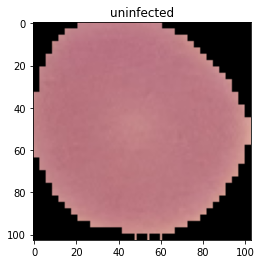

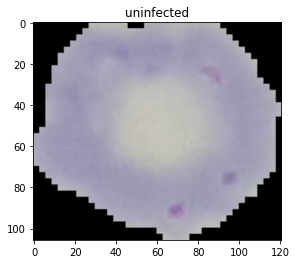

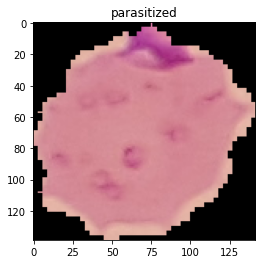

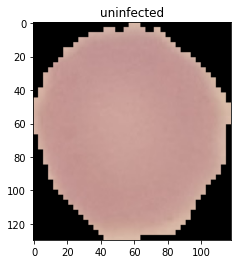

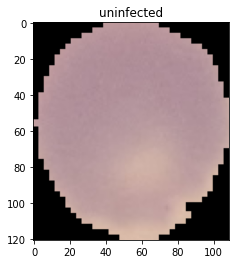

In [ ]:
get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(5):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

## Preprocessing

In [ ]:
IMG_SIZE = 80

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image =  tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [ ]:
train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

Now lets take a look at the modified images

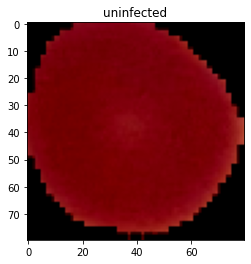

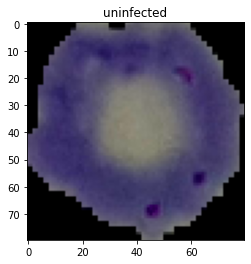

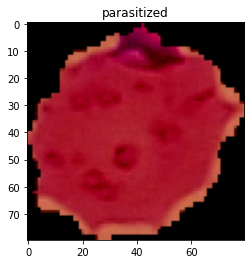

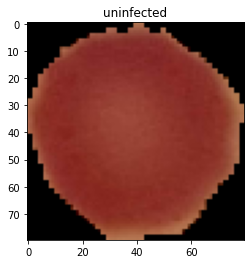

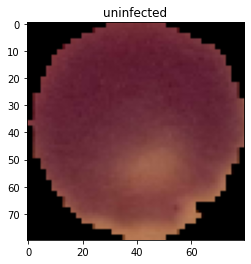

In [ ]:
for image, label in train.take(5):
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

In [ ]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

model = models.Sequential()

In [ ]:
# Adding first convolution layer
model.add(layers.Conv2D(64, (3, 3), input_shape = (80, 80, 3), activation = 'relu'))

# Adding pooling layer
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

# Adding second convolution layer
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

# Adding pooling layer
model.add(layers.MaxPooling2D(2, 2))

# Adding third convolution layer
model.add(layers.Conv2D(32, (3, 3), activation = 'relu'))

# Adding pooling layer
model.add(layers.MaxPooling2D(2, 2))

# Flattening
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(units = 64, activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 78, 78, 64)        1792      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 39, 39, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 64)        36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 18, 18, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 8, 8, 32)        

## Training the model

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [ ]:
initial_epochs = 10

history = model.fit(train_batches,
                    epochs = initial_epochs,
                    validation_data = validation_batches)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


689/689 [==============================] - 38s 52ms/step - loss: 0.2345 - accuracy: 0.9089 - val_loss: 0.1520 - val_accuracy: 0.9536
Epoch 2/10
689/689 [==============================] - 37s 52ms/step - loss: 0.1422 - accuracy: 0.9531 - val_loss: 0.1617 - val_accuracy: 0.9481
Epoch 3/10
689/689 [==============================] - 37s 52ms/step - loss: 0.1388 - accuracy: 0.9566 - val_loss: 0.1557 - val_accuracy: 0.9507
Epoch 4/10
689/689 [==============================] - 35s 49ms/step - loss: 0.1321 - accuracy: 0.9579 - val_loss: 0.1504 - val_accuracy: 0.9594
Epoch 5/10
689/689 [==============================] - 32s 46ms/step - loss: 0.1424 - accuracy: 0.9584 - val_loss: 0.1420 - val_accuracy: 0.9536
Epoch 6/10
689/689 [==============================] - 37s 53ms/step - loss: 0.1295 - accuracy: 0.9575 - val_loss: 0.1660 - val_accuracy: 0.9467
Epoch 7/10
689/689 [==============================] - 37s 52ms/step - loss: 0.1302 - accuracy: 0.9565 - val_loss: 0.2347 - val_accuracy: 0.9568
Epo

[[0.99966383]]
[[0.9989191]]


[[4.4766776e-07]]
[[0.93118864]]


[[0.97791004]]


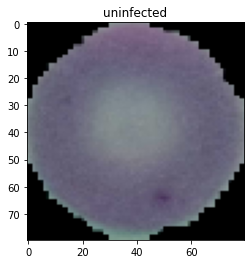

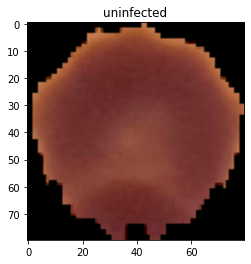

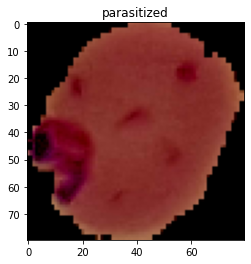

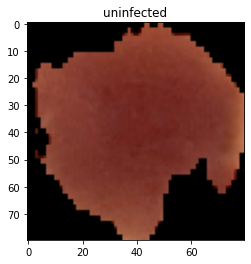

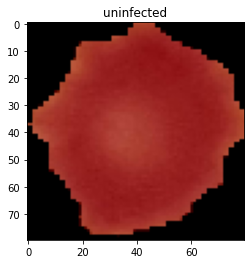

In [ ]:
for image, label in test.take(5):
    image_list = []
    image_list.append(np.array(image))
    x = np.asarray(image_list)
    predictions = model.predict(x)
    print(predictions)
    plt.figure()
    plt.imshow(image)
    plt.title(get_label_name(label))

In [ ]:
model.save('malaria_cel')